### Name : SARVESH SHETE
### Prn no. : 1032212107

In [2]:
import numpy as np
import cv2
import os
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import to_categorical
from keras.optimizers import Adam,RMSprop

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.models import Sequential

from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Constants

In [3]:
LABELS = ["German_shephard","Doberman","Chihuahua","Golden_Retriver","Labrador","Siberian_Husky","Pug","French_bulldog","Shih_Tzu","Tibetian_Mastiff"]

In [4]:
german_shepherd_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed2/german_shepherd/*")
doberman_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed2/doberman/*")
chihuahua_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed2/chihuahua/*")
golden_retriever_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed2/golden_retriever/*")
labrador_retriever_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed2/labrador_retriever/*") 
siberian_husky_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed2/siberian_husky/*")
pug_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed2/pug/*")
french_bulldog_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed2/french_bulldog/*")
shih_tzu_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed2/shih_tzu/*")
tibetan_mastiff_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed2/tibetan_mastiff/*") 

In [5]:
images = []
labels = []

for im_path in german_shepherd_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224)) 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(0)
    except:
        print(im_path)

for im_path in doberman_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224)) 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(1)
    except:
        print(im_path)
    
for im_path in chihuahua_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224)) 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(2)
    except:
        print(im_path)

for im_path in golden_retriever_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224)) 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(3)
    except:
        print(im_path)

for im_path in labrador_retriever_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224)) 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(4)  
    except:
        print(im_path)
    
for im_path in siberian_husky_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224)) 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(5)  
    except:
        print(im_path)

for im_path in pug_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224)) 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(6)  
    except:
        print(im_path)

for im_path in french_bulldog_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224)) 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(7)  
    except:
        print(im_path)

for im_path in shih_tzu_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224)) 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(8)  
    except:
        print(im_path)

for im_path in tibetan_mastiff_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224)) 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(9)  
    except:
        print(im_path)

data = np.array(images)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(1692, 224, 224, 3)
(1692,)


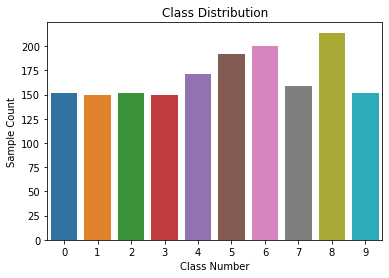

In [6]:
# class distrubiton
plt.subplots(figsize=(6,4))
sns.countplot(labels)
plt.title("Class Distribution")
plt.xlabel("Class Number")
plt.ylabel("Sample Count")
plt.show()

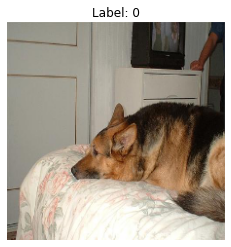

In [7]:
# checking random samples
def check_sample(idx):
    plt.imshow(data[idx])
    plt.title("Label: {}".format(labels[idx]))
    plt.axis("off")
    plt.show()
    
check_sample(13)

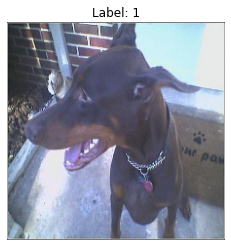

In [12]:
check_sample(175)

In [13]:
# label encoding
labels = to_categorical(labels,num_classes=4)
labels.shape

(1692, 10)

In [14]:
labels[200]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
# train test splitting
x_train,x_test,y_train,y_test = train_test_split(data,labels)

print("x_train shape ",x_train.shape)
print("x_test shape" ,x_test.shape)
print("y_train shape ",y_train.shape)
print("y_test shape ",y_test.shape)

# x_test = x_test/255.0 

x_train shape  (1269, 224, 224, 3)
x_test shape (423, 224, 224, 3)
y_train shape  (1269, 10)
y_test shape  (423, 10)


In [12]:
x_train,x_val,y_train, y_val = train_test_split(x_train,y_train,test_size= 0.25)

print("x_train shape ",x_train.shape)
print("x_val shape" ,x_val.shape)
print("y_train shape ",y_train.shape)
print("y_val shape ",y_val.shape)

# x_val = x_val/255.0

x_train shape  (951, 224, 224, 3)
x_val shape (318, 224, 224, 3)
y_train shape  (951, 10)
y_val shape  (318, 10)


In [13]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.nasnet import NASNetMobile

pre_trained_model = NASNetMobile(input_shape = (224, 224, 3), 
                                include_top = False)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

separable_conv_1_normal_right2_ (None, 7, 7, 176)    32560       activation_171[0][0]             
__________________________________________________________________________________________________
separable_conv_1_normal_left5_1 (None, 7, 7, 176)    32560       activation_173[0][0]             
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 7, 7, 176)    704         separable_conv_1_normal_left1_11[
__________________________________________________________________________________________________
separable_conv_1_bn_normal_righ (None, 7, 7, 176)    704         separable_conv_1_normal_right1_11
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 7, 7, 176)    704         separable_conv_1_normal_left2_11[
__________________________________________________________________________________________________
separable_

In [14]:
last_layer = pre_trained_model.get_layer('activation_187')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 1056)


In [15]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
                
# Add a final sigmoid layer for classification
x = layers.Dense  (10, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

optim = Adam(lr=1e-4)
model.compile(optimizer=optim,loss="categorical_crossentropy",metrics=["accuracy"])

In [16]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           stem_bn1[0][0]                   
_______________________________________________________________________________________

normal_add_4_1 (Add)            (None, 28, 28, 44)   0           normal_left4_1[0][0]             
                                                                 normal_right4_1[0][0]            
__________________________________________________________________________________________________
normal_add_5_1 (Add)            (None, 28, 28, 44)   0           separable_conv_2_bn_normal_left5_
                                                                 normal_bn_1_1[0][0]              
__________________________________________________________________________________________________
normal_concat_1 (Concatenate)   (None, 28, 28, 264)  0           adjust_bn_1[0][0]                
                                                                 normal_add_1_1[0][0]             
                                                                 normal_add_2_1[0][0]             
                                                                 normal_add_3_1[0][0]             
          

__________________________________________________________________________________________________
activation_163 (Activation)     (None, 7, 7, 1056)   0           normal_concat_9[0][0]            
__________________________________________________________________________________________________
activation_164 (Activation)     (None, 7, 7, 1056)   0           normal_concat_10[0][0]           
__________________________________________________________________________________________________
adjust_conv_projection_11 (Conv (None, 7, 7, 176)    185856      activation_163[0][0]             
__________________________________________________________________________________________________
normal_conv_1_11 (Conv2D)       (None, 7, 7, 176)    185856      activation_164[0][0]             
__________________________________________________________________________________________________
adjust_bn_11 (BatchNormalizatio (None, 7, 7, 176)    704         adjust_conv_projection_11[0][0]  
__________

Total params: 4,787,166
Trainable params: 517,450
Non-trainable params: 4,269,716
__________________________________________________________________________________________________


In [17]:
# performing data argumentation by training image generator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
call = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

In [19]:
history = model.fit(train_datagen.flow(x_train,y_train),
                    validation_data=test_datagen.flow(x_val,y_val),
                    epochs=20,
                    verbose=1)


Epoch 1/20
30/30 [==============================] - 51s 2s/step - loss: 0.8632 - accuracy: 0.7403 - val_loss: 0.1815 - val_accuracy: 0.9434
Epoch 2/20
30/30 [==============================] - 49s 2s/step - loss: 0.3260 - accuracy: 0.9064 - val_loss: 0.1795 - val_accuracy: 0.9497
Epoch 3/20
30/30 [==============================] - 48s 2s/step - loss: 0.2724 - accuracy: 0.9201 - val_loss: 0.1445 - val_accuracy: 0.9497
Epoch 4/20
30/30 [==============================] - 49s 2s/step - loss: 0.2501 - accuracy: 0.9201 - val_loss: 0.1866 - val_accuracy: 0.9465
Epoch 5/20
30/30 [==============================] - 49s 2s/step - loss: 0.1864 - accuracy: 0.9422 - val_loss: 0.1491 - val_accuracy: 0.9560
Epoch 6/20
30/30 [==============================] - 50s 2s/step - loss: 0.2037 - accuracy: 0.9295 - val_loss: 0.1365 - val_accuracy: 0.9465
Epoch 7/20
30/30 [==============================] - 53s 2s/step - loss: 0.1753 - accuracy: 0.9453 - val_loss: 0.1794 - val_accuracy: 0.9497
Epoch 8/20
30/30 [==

In [20]:
result = model.evaluate(test_datagen.flow(x_test,y_test))

14/14 [==============================] - 18s 1s/step - loss: 0.2797 - accuracy: 0.9362


In [19]:
# model.save('Nasanetmobile.h5')

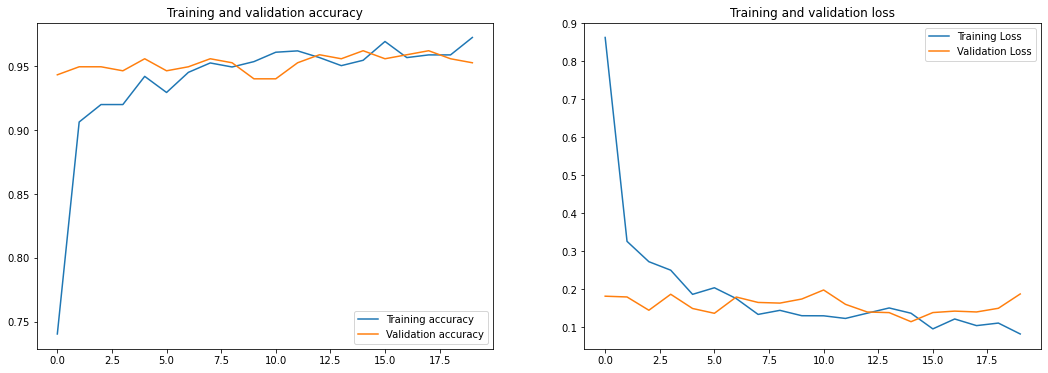

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.subplots(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model('Nasanetmobile.h5')

# Predictions

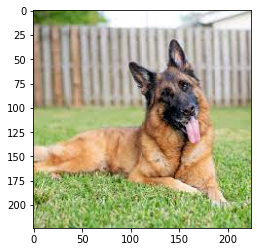

In [16]:
from tensorflow.keras.preprocessing import image
file_name='C:/Users/ASUS/Desktop/doc/Notes/download.jpg'       
img = image.load_img(file_name, target_size=(224,224))
plt.imshow(img)

In [17]:
def prediction_breed(file_name):
    try:      
        img = image.load_img(file_name, target_size=(224,224))
        plt.imshow(img)
        resized_img = image.img_to_array(img)
        resized_img = resized_img/255.0
        final_image = np.expand_dims(resized_img, axis=0)  #need 4th dimension
        np.set_printoptions(precision=5)
        predictions = model.predict(final_image)[0]
        index = np.argmax(predictions)
        print(predictions[index])
        print(LABELS[index])
    except OSError as e:
        print("Please provide right image format as well as image_path directory ")

1.0
German_shephard


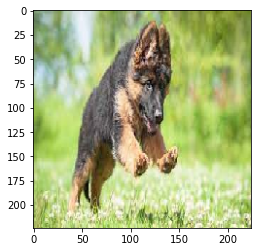

In [24]:
file_name='C:/Users/ASUS/Desktop/doc/Notes/5.jpg'       
prediction_breed(file_name)

In [32]:
def prediction1(img):
    try:      
        resized_img = image.img_to_array(img)
        resized_img = resized_img/255.0
        final_image = np.expand_dims(resized_img, axis=0)  #need 4th dimension
        predictions = model.predict(final_image)[0]
        index = np.argmax(predictions)
        return index
#         print(predictions[index])
#         print(LABELS[index])
    except OSError as e:
        print("Please provide right image format")

In [34]:
a = labels[501]
a

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [35]:
np.argmax(a) 

3

In [30]:
len(y_test)

423

In [33]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [36]:
y_classes = [np.argmax(y) for y in y_test]
y_classes

[5,
 4,
 9,
 2,
 8,
 9,
 9,
 5,
 3,
 0,
 5,
 3,
 9,
 0,
 8,
 6,
 6,
 5,
 5,
 2,
 0,
 2,
 0,
 8,
 0,
 7,
 8,
 6,
 8,
 1,
 2,
 8,
 2,
 1,
 7,
 6,
 5,
 9,
 1,
 3,
 3,
 9,
 3,
 9,
 6,
 3,
 5,
 6,
 9,
 0,
 2,
 5,
 1,
 2,
 3,
 6,
 9,
 5,
 7,
 7,
 5,
 1,
 2,
 4,
 0,
 5,
 2,
 5,
 2,
 8,
 3,
 3,
 1,
 7,
 1,
 5,
 2,
 4,
 3,
 5,
 4,
 6,
 0,
 6,
 9,
 9,
 5,
 9,
 9,
 4,
 1,
 2,
 6,
 5,
 5,
 4,
 3,
 1,
 5,
 0,
 3,
 7,
 0,
 7,
 0,
 5,
 8,
 8,
 1,
 2,
 3,
 9,
 4,
 1,
 9,
 0,
 2,
 1,
 0,
 7,
 6,
 3,
 5,
 0,
 2,
 2,
 7,
 8,
 4,
 5,
 7,
 7,
 6,
 9,
 6,
 6,
 4,
 3,
 4,
 5,
 6,
 2,
 0,
 9,
 4,
 3,
 2,
 8,
 7,
 5,
 4,
 8,
 6,
 1,
 3,
 0,
 4,
 6,
 9,
 5,
 6,
 5,
 7,
 2,
 5,
 7,
 4,
 6,
 6,
 8,
 8,
 2,
 3,
 6,
 7,
 7,
 1,
 5,
 2,
 7,
 8,
 1,
 0,
 3,
 7,
 3,
 1,
 5,
 5,
 1,
 5,
 7,
 0,
 7,
 3,
 5,
 8,
 3,
 8,
 8,
 6,
 1,
 1,
 7,
 8,
 8,
 9,
 5,
 9,
 0,
 7,
 9,
 6,
 0,
 0,
 4,
 1,
 8,
 2,
 8,
 4,
 9,
 5,
 0,
 4,
 6,
 2,
 2,
 7,
 3,
 6,
 6,
 4,
 4,
 1,
 3,
 6,
 8,
 7,
 6,
 2,
 7,
 1,
 2,
 9,
 2,
 8,
 9,
 3,
 7,


In [38]:
len(y_classes)

423

In [37]:
Y_pred = []
for ex in x_test:
    Y_pred.append(prediction1(ex))
    
Y_pred

[5,
 1,
 9,
 2,
 8,
 9,
 9,
 5,
 3,
 0,
 5,
 3,
 9,
 0,
 9,
 6,
 6,
 5,
 5,
 6,
 0,
 2,
 0,
 8,
 0,
 7,
 8,
 6,
 8,
 1,
 2,
 8,
 2,
 1,
 7,
 6,
 3,
 9,
 1,
 3,
 3,
 9,
 3,
 9,
 6,
 3,
 5,
 6,
 9,
 0,
 7,
 5,
 1,
 2,
 3,
 6,
 9,
 5,
 7,
 7,
 5,
 1,
 2,
 4,
 3,
 5,
 2,
 5,
 2,
 8,
 3,
 3,
 1,
 7,
 1,
 5,
 2,
 4,
 3,
 6,
 4,
 6,
 0,
 7,
 9,
 9,
 5,
 9,
 9,
 4,
 1,
 2,
 6,
 5,
 5,
 4,
 3,
 1,
 3,
 0,
 3,
 7,
 0,
 6,
 0,
 5,
 8,
 8,
 1,
 2,
 3,
 9,
 7,
 1,
 9,
 0,
 2,
 1,
 0,
 7,
 6,
 3,
 5,
 0,
 2,
 2,
 7,
 8,
 4,
 5,
 7,
 7,
 6,
 9,
 8,
 6,
 4,
 3,
 3,
 5,
 6,
 2,
 0,
 9,
 4,
 3,
 2,
 8,
 7,
 5,
 1,
 8,
 6,
 1,
 3,
 0,
 4,
 6,
 9,
 7,
 6,
 5,
 7,
 2,
 1,
 7,
 4,
 6,
 6,
 8,
 8,
 4,
 3,
 6,
 7,
 7,
 1,
 5,
 2,
 7,
 8,
 1,
 3,
 4,
 7,
 3,
 1,
 5,
 5,
 1,
 5,
 7,
 0,
 7,
 3,
 5,
 8,
 3,
 8,
 8,
 6,
 1,
 1,
 7,
 8,
 8,
 9,
 5,
 9,
 0,
 7,
 9,
 6,
 0,
 0,
 4,
 1,
 8,
 2,
 8,
 4,
 9,
 5,
 0,
 4,
 6,
 2,
 2,
 7,
 3,
 6,
 6,
 4,
 4,
 1,
 3,
 6,
 8,
 7,
 6,
 2,
 7,
 1,
 2,
 9,
 2,
 8,
 9,
 3,
 7,


In [39]:
len(Y_pred)

423

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_classes, Y_pred)

0.9361702127659575

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_classes, Y_pred, target_names=LABELS))

                  precision    recall  f1-score   support

 German_shephard       1.00      0.94      0.97        34
        Doberman       0.90      1.00      0.95        37
       Chihuahua       1.00      0.88      0.94        43
 Golden_Retriver       0.89      0.91      0.90        45
        Labrador       0.88      0.90      0.89        39
  Siberian_Husky       1.00      0.91      0.95        54
             Pug       0.94      0.92      0.93        48
  French_bulldog       0.87      0.97      0.92        40
        Shih_Tzu       0.94      0.98      0.96        47
Tibetian_Mastiff       0.97      0.97      0.97        36

        accuracy                           0.94       423
       macro avg       0.94      0.94      0.94       423
    weighted avg       0.94      0.94      0.94       423



In [42]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_classes, Y_pred)
print(cm)

[[32  0  0  2  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  1  0  1  3  0  0]
 [ 0  0  0 41  4  0  0  0  0  0]
 [ 0  2  0  1 35  0  0  1  0  0]
 [ 0  1  0  2  0 49  1  1  0  0]
 [ 0  1  0  0  0  0 44  1  2  0]
 [ 0  0  0  0  0  0  1 39  0  0]
 [ 0  0  0  0  0  0  0  0 46  1]
 [ 0  0  0  0  0  0  0  0  1 35]]


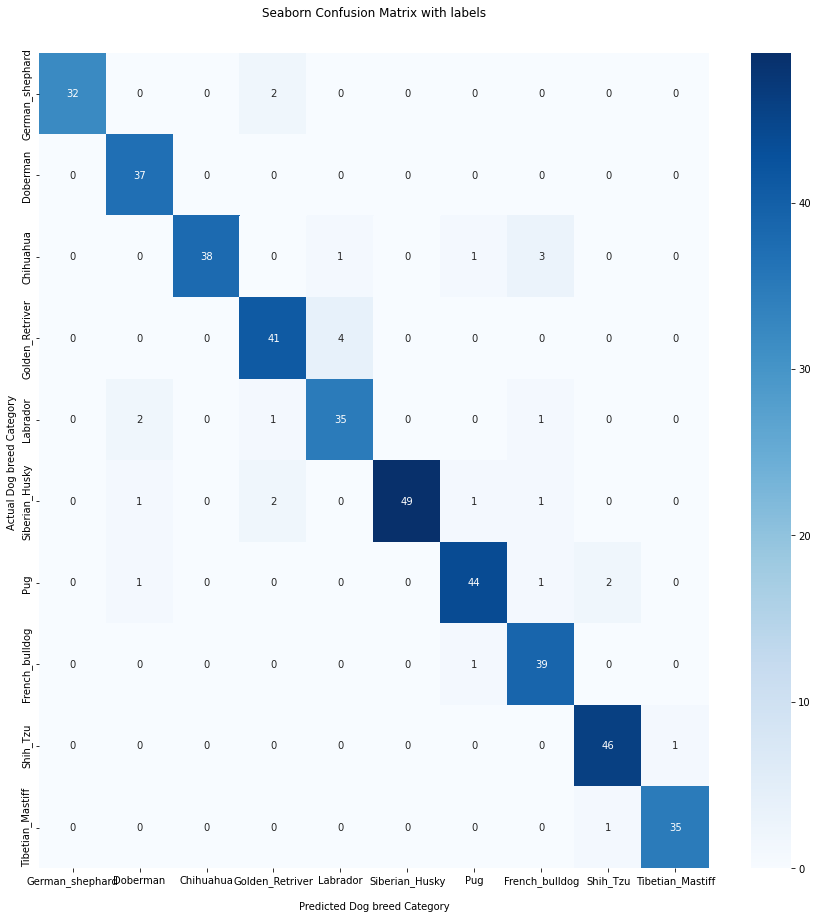

In [43]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Dog breed Category')
ax.set_ylabel('Actual Dog breed Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(LABELS)
ax.yaxis.set_ticklabels(LABELS)

## Display the visualization of the Confusion Matrix.
plt.show()

In [46]:
37/41

0.9024390243902439

In [45]:
32/34

0.9411764705882353